In [1]:
# For data analysis
import os
import numpy as np
import pandas as pd

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt 
from pylab import rcParams
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = [16, 9]
sns.set_context("talk")
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('show_dimensions', True)

In [3]:
# set path
data_path = "data"
beh_path = "beh"
# set task name
wordtask = "wordchoice"
imagetask = "imagechoice"
witask = "wordimagematch"

In [14]:
max_time = 5000
# read animacy table
animacy_path = "./assets/animacy.xlsx"
association_path = "./assets/association.csv"
animacy = pd.read_excel(animacy_path, sheet_name=0)
association = pd.read_csv(association_path)

In [15]:
# get animacy dict of words
animacy_dict = {}
for index, row in animacy.iterrows():
    animacy_dict[row["animate"]] = "animate"
    animacy_dict[row["non-animate"]] = "non-animate"

In [16]:
# word/image match dict in wordimageChoice task
association["relation"] = association.isMatch.map({True: "match", False: "nomatch"})
association = association[["item_word", "item_image", "relation"]]
association.drop_duplicates(inplace=True)
match_dict = {}
for index, row in association.iterrows():
    match_dict[row["item_word"]] = row["relation"]
    match_dict[row["item_image"]] = row["relation"]

## wordChoice

In [17]:
sub = "sub-001"
word_df = pd.read_csv(os.path.join(data_path, sub, beh_path, "{}_task-{}_beh.csv").format(sub, wordtask))
word_df = word_df[1:321]
# rename option
for option in ["option_left", "option_right"]:
    word_df[option] = word_df[option].map({"有生命":"animate", "无生命":"non-animate"})
# rename mouse.clicked_name columns
word_df["mouse.clicked_name"] = word_df["mouse.clicked_name"].map({"rect_left":"left", "rect_right":"right"})
word_df.rename(columns={"mouse.clicked_name":"side"}, inplace=True)

In [9]:
# get animacy of word
word_df["animacy"] = word_df["item"].apply(lambda x: animacy_dict[x])
# match relation in wordimageChoice
word_df["relation"] = word_df["item"].apply(lambda x: match_dict[x])
# get rt
word_df["rt"] = word_df[["word_item.started", "word_item_2.started"]].apply(lambda x: np.round((x["word_item_2.started"] - x["word_item.started"]) * 1000), axis=1)
# get mouse response
word_df["response"] = word_df.apply(lambda x: x["option_left"] if x["side"] == "left" else x["option_right"], axis=1)
# calculate correct
word_df["correct"] = word_df.apply(lambda x: x["animacy"] == x["response"], axis=1)

In [10]:
word_df = word_df[word_df["rt"] < max_time]

### wordChoice RT

Text(0.5, 1.0, 'wordChoice RT')

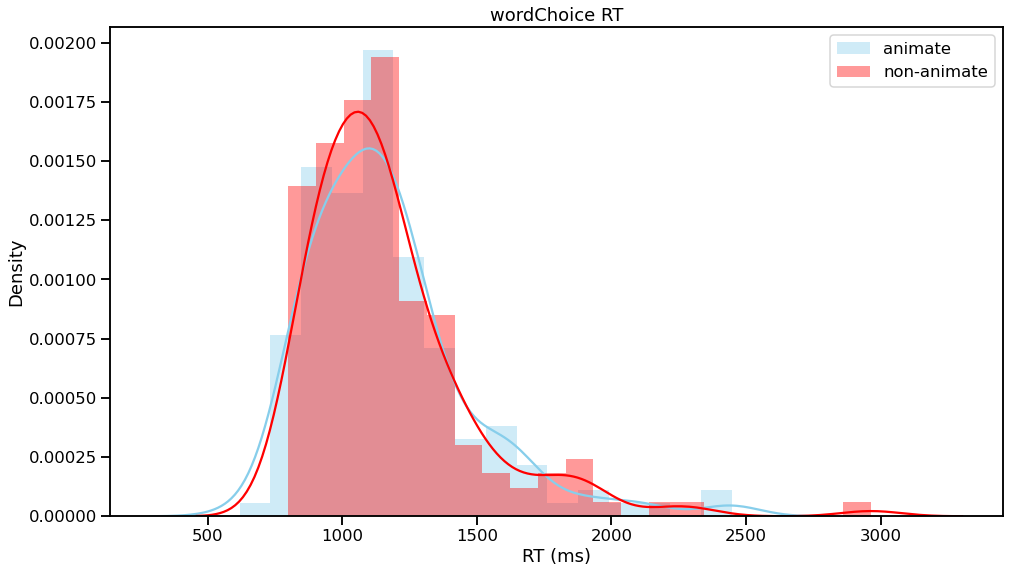

In [11]:
# animate/non-animate
sns.distplot(word_df[word_df["animacy"] == "animate"]["rt"], color="skyblue", label="animate")
sns.distplot(word_df[word_df["animacy"] == "non-animate"]["rt"], color="red", label="non-animate")
plt.legend()
plt.xlabel("RT (ms)")
# plt.ylabel("frequency")
plt.title("wordChoice RT")

Text(0.5, 1.0, 'wordChoice RT')

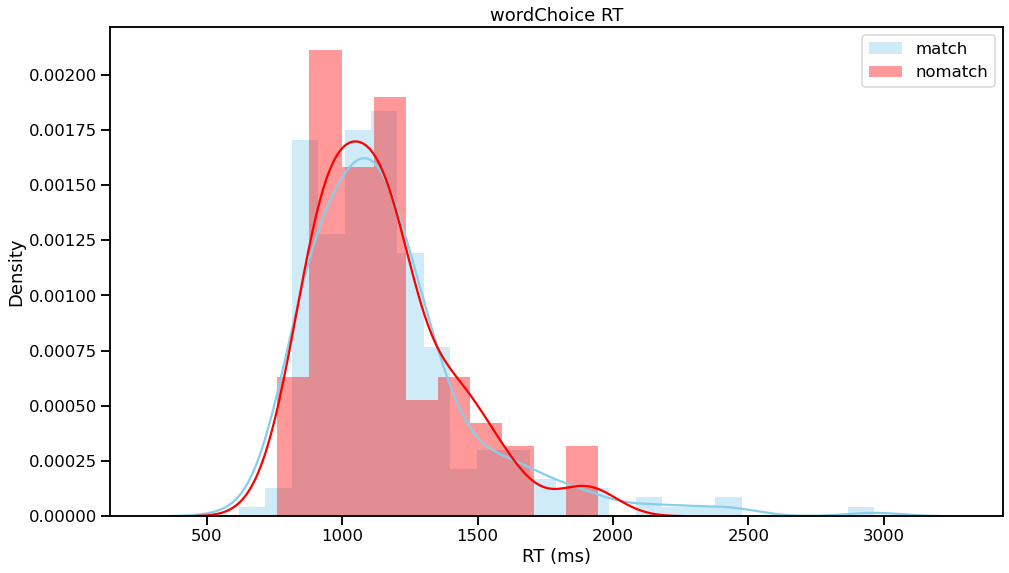

In [12]:
# match/nomatch
sns.distplot(word_df[word_df["relation"] == "match"]["rt"], color="skyblue", label="match")
sns.distplot(word_df[word_df["relation"] == "nomatch"]["rt"], color="red", label="nomatch")
plt.legend()
plt.xlabel("RT (ms)")
plt.title("wordChoice RT")

### wordChoice accuracy

In [13]:
word_df[word_df["animacy"] == "animate"]["correct"].sum() / word_df[word_df["animacy"] == "animate"].shape[0]

0.93125

In [14]:
word_df[word_df["animacy"] == "non-animate"]["correct"].sum() / word_df[word_df["animacy"] == "non-animate"].shape[0]

0.95625

Text(0.5, 1.0, 'wordChoice accuracy')

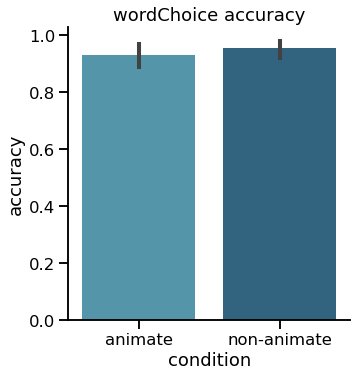

In [15]:
# accuracy
sns.catplot(x="animacy", y="correct", kind="bar", palette='YlGnBu_d', data=word_df)
plt.xlabel("condition")
plt.ylabel("accuracy")
plt.title("wordChoice accuracy")

Text(0.5, 1.0, 'wordChoice accuracy')

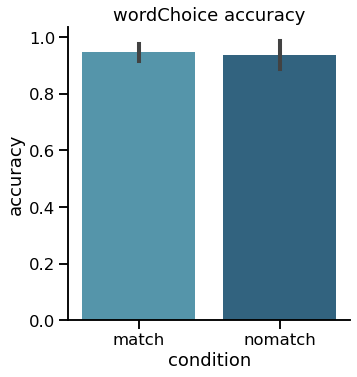

In [16]:
# accuracy
sns.catplot(x="relation", y="correct", kind="bar", palette='YlGnBu_d', data=word_df)
plt.xlabel("condition")
plt.ylabel("accuracy")
plt.title("wordChoice accuracy")

## imageChoice

In [17]:
sub = "sub-001"
image_df = pd.read_csv(os.path.join(data_path, sub, beh_path, "{}_task-{}_beh.csv").format(sub, imagetask))
if image_df.shape[0] > 320:
    image_df.drop(axis=0, index=0, inplace=True)
# rename option
for option in ["option_left", "option_right"]:
    image_df[option] = image_df[option].map({"有生命":"animate", "无生命":"non-animate"})
# rename mouse.clicked_name columns
image_df["mouse.clicked_name"] = image_df["mouse.clicked_name"].map({"rect_left":"left", "rect_right":"right"})
image_df.rename(columns={"mouse.clicked_name":"side"}, inplace=True)

In [18]:
image_df = image_df[:320]

In [19]:
# get animacy of image
image_df["animacy"] = image_df["item"].apply(lambda x: x.split("/")[0])
# match relation in wordimageChoice
image_df["relation"] = image_df["item"].apply(lambda x: match_dict[x])
# get rt
image_df["rt"] = image_df[["image_item.started", "image_item_2.started"]].apply(lambda x: np.round((x["image_item_2.started"] - x["image_item.started"]) * 1000), axis=1)
# get mouse response
image_df["response"] = image_df.apply(lambda x: x["option_left"] if x["side"] == "left" else x["option_right"], axis=1)
# calculate correct
image_df["correct"] = image_df.apply(lambda x: x["animacy"] == x["response"], axis=1)

In [20]:
image_df = image_df[image_df["rt"] < max_time]

### imageChoice RT

Text(0.5, 1.0, 'imageChoice RT')

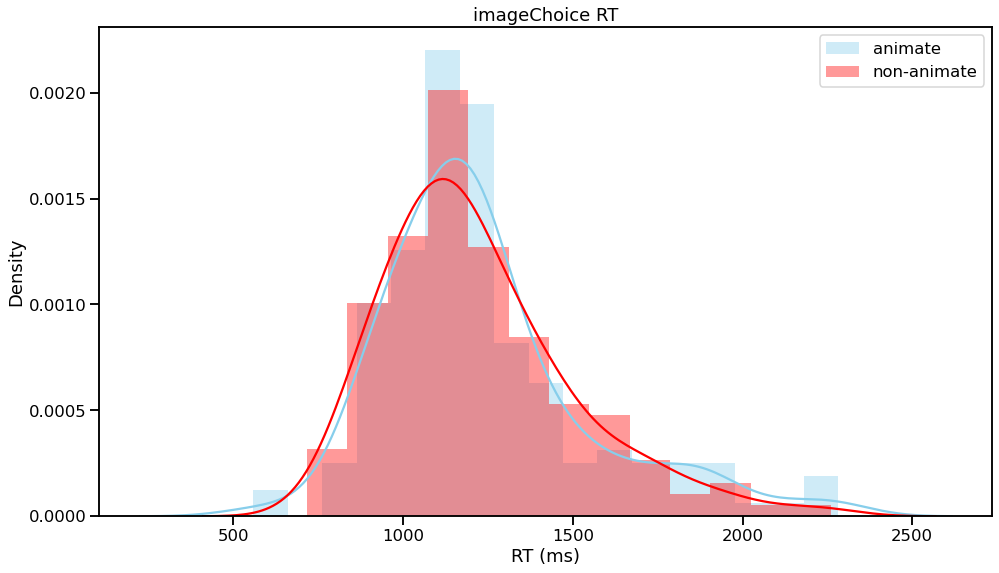

In [21]:
# animate/non-animate
sns.distplot(image_df[image_df["animacy"] == "animate"]["rt"], color="skyblue", label="animate")
sns.distplot(image_df[image_df["animacy"] == "non-animate"]["rt"], color="red", label="non-animate")
plt.legend()
plt.xlabel("RT (ms)")
plt.title("imageChoice RT")

Text(0.5, 1.0, 'imageChoice RT')

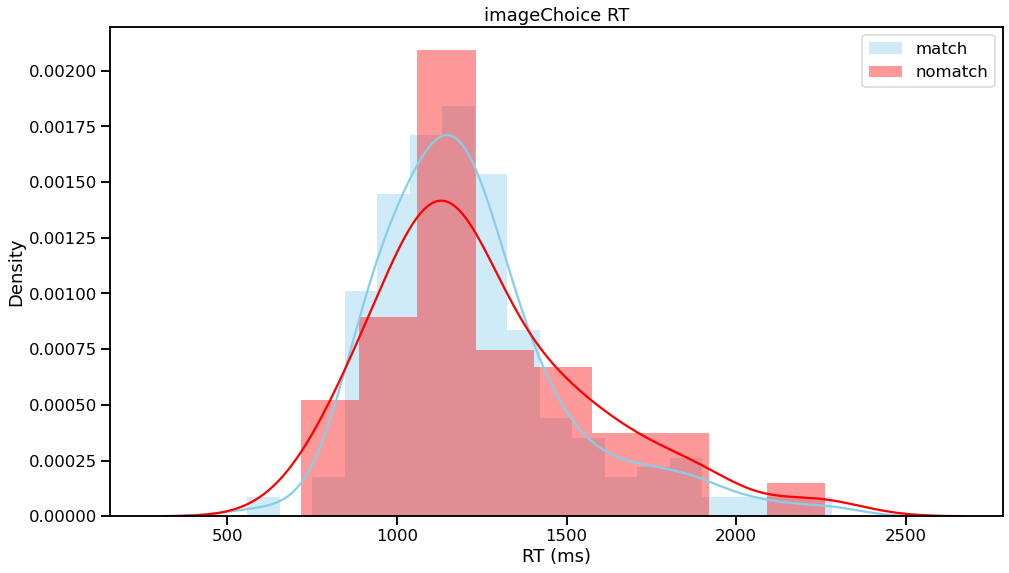

In [22]:
# match/nomatch
sns.distplot(image_df[image_df["relation"] == "match"]["rt"], color="skyblue", label="match")
sns.distplot(image_df[image_df["relation"] == "nomatch"]["rt"], color="red", label="nomatch")
plt.legend()
plt.xlabel("RT (ms)")
plt.title("imageChoice RT")

### imageChoice acc

In [23]:
image_df[image_df["animacy"] == "animate"]["correct"].sum() / image_df[image_df["animacy"] == "animate"].shape[0]

0.9681528662420382

In [24]:
image_df[image_df["animacy"] == "non-animate"]["correct"].sum() / image_df[image_df["animacy"] == "non-animate"].shape[0]

0.9056603773584906

Text(0.5, 1.0, 'imageChoice accuracy')

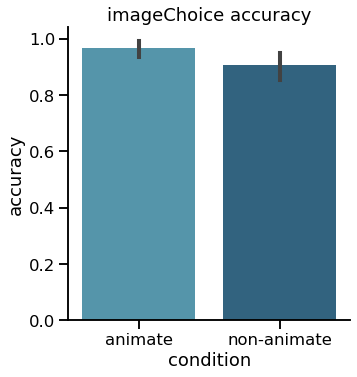

In [25]:
# accuracy
sns.catplot(x="animacy", y="correct", kind="bar", palette='YlGnBu_d', data=image_df)
plt.xlabel("condition")
plt.ylabel("accuracy")
plt.title("imageChoice accuracy")

Text(0.5, 1.0, 'imageChoice accuracy')

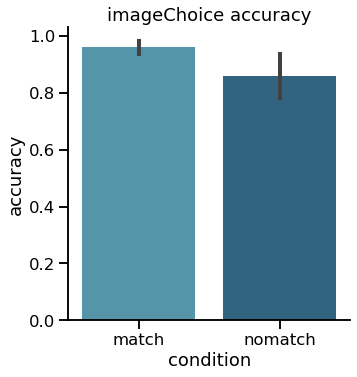

In [26]:
# accuracy
sns.catplot(x="relation", y="correct", kind="bar", palette='YlGnBu_d', data=image_df)
plt.xlabel("condition")
plt.ylabel("accuracy")
plt.title("imageChoice accuracy")

## wordImageChoice

In [27]:
sub = "sub-001"
wi_df = pd.read_csv(os.path.join(data_path, sub, beh_path, "{}_task-{}_beh.csv").format(sub, witask))
if wi_df.shape[0] > 320:
    wi_df.drop(axis=0, index=0, inplace=True)
# rename option
for option in ["option_left", "option_right"]:
    wi_df[option] = wi_df[option].map({"匹配":"match", "不匹配":"nomatch"})
# rename mouse.clicked_name columns
wi_df["mouse.clicked_name"] = wi_df["mouse.clicked_name"].map({"rect_left":"left", "rect_right":"right"})
wi_df.rename(columns={"mouse.clicked_name":"side"}, inplace=True)

In [28]:
wi_df = wi_df[:320]

In [29]:
# get animacy of word
wi_df["animacy"] = wi_df["item_word"].apply(lambda x: animacy_dict[x])
# match or not
wi_df["relation"] = wi_df["isMatch"].map({True:"match", False:"nomatch"})
# get rt
wi_df["rt"] = wi_df[["word_item.started", "word_item_2.started"]].apply(lambda x: np.round((x["word_item_2.started"] - x["word_item.started"]) * 1000), axis=1)
# get mouse response
wi_df["response"] = wi_df.apply(lambda x: x["option_left"] if x["side"] == "left" else x["option_right"], axis=1)
# calculate correct
wi_df["correct"] = wi_df.apply(lambda x: x["relation"] == x["response"], axis=1)

In [30]:
wi_df = wi_df[wi_df["rt"] < max_time]

### wordImageChoice RT

Text(0.5, 1.0, 'wordImageChoice RT')

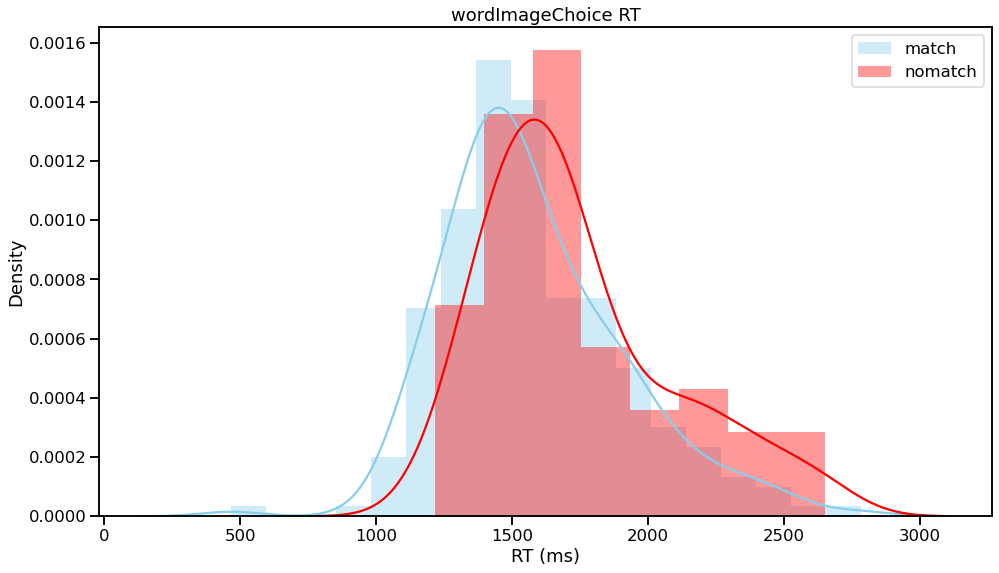

In [32]:
# match/nomatch
sns.distplot(wi_df[wi_df["relation"] == "match"]["rt"], color="skyblue", label="match")
sns.distplot(wi_df[wi_df["relation"] == "nomatch"]["rt"], color="red", label="nomatch")
plt.legend()
plt.xlabel("RT (ms)")
plt.title("wordImageChoice RT")

In [33]:
# animate/non-animate
# sns.distplot(wi_df[wi_df["animacy"] == "animate"]["rt"], color="skyblue", label="animate")
# sns.distplot(wi_df[wi_df["animacy"] == "non-animate"]["rt"], color="red", label="non-animate")
# plt.legend()
# plt.xlabel("RT (ms)")
# plt.title("wordImageChoice RT")

### wordImageChoice acc

Text(0.5, 1.0, 'wordChoice accuracy')

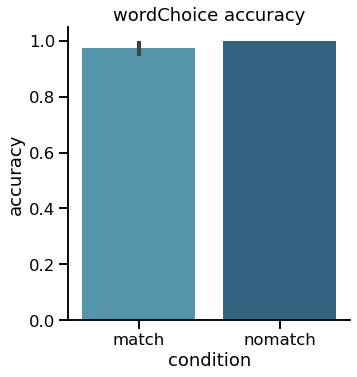

In [34]:
# accuracy
sns.catplot(x="relation", y="correct", kind="bar", palette='YlGnBu_d', data=wi_df)
plt.xlabel("condition")
plt.ylabel("accuracy")
plt.title("wordChoice accuracy")

## word-image RT

Text(0.5, 1.0, 'word/image RT')

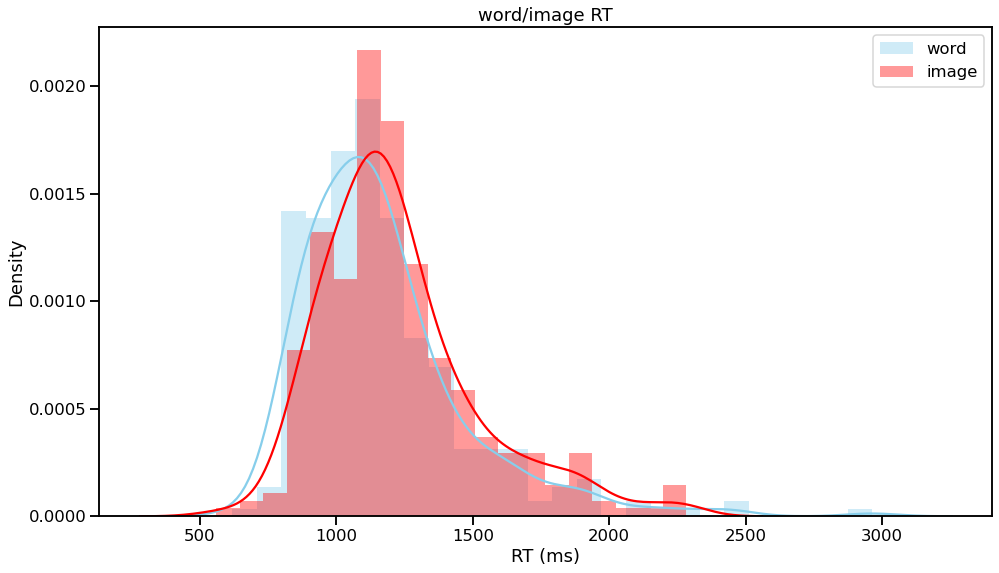

In [35]:
# word/image RT
sns.distplot(word_df["rt"], color="skyblue", label="word")
sns.distplot(image_df["rt"], color="red", label="image")
plt.legend()
plt.xlabel("RT (ms)")
plt.title("word/image RT")